In [1]:
from tools.tokenizer import Tokenizer
from tools.generator import Generator
import tools.files as files

from algorithms.sat import Sat

In [2]:
# Puedo crear una expresion manualmente

expression = 'a and b and not c and (a or b or not a)'

In [24]:
# Puedo generar expresiones automaticamente

gen = Generator(clause_count=9, literals_per_clause=3, variable_count=17, var_name='x')

expression = gen.generate()

In [3]:
# Genero los tokens para identificar las variables de la expresion

tokenizer = Tokenizer(expression)
tokens, var_names = tokenizer.tokenize()

print('Expresion:', expression)
print('\nContador de tokens:', tokens)
print('\nVariables de la expresion:', var_names)

Expresion: a and b and not c and (a or b or not a)

Contador de tokens: {'and': 3, 'or': 2, 'not': 2, '(': 1, ')': 1, 'var': 6}

Variables de la expresion: ['a', 'b', 'c']


In [4]:
# ejecuto el algoritmo, que toma como parametros la expresion, el arreglo de variables
# y un booleano que indica si se hace un reporte de las operaciones

sat = Sat()

result_sat, time = sat.sat_algorithm(expression, var_names, verbose=False)

print('\nExecution time {} seconds'.format(time))

if len(result_sat) > 0:
        print('\nExpression "{}" is True'.format(expression))
        print('\nNumber of solutions is {}\n'.format(len(result_sat)))
        print(result_sat[0])
else:
        print('\nExpression "{}" is False'.format(expression))


Execution time 0.0003737000000043622 seconds

Expression "a and b and not c and (a or b or not a)" is True

Number of solutions is 1

{'a': 1, 'b': 1, 'c': 0}


In [1]:
files.reset_result("result_sat_optimo")

for n in range(2, 8):

    gen = Generator(clause_count=(n), literals_per_clause=(n//2), variable_count=n, var_name='x')
    expression = gen.generate()

    print('Evaluating...')

    tokenizer = Tokenizer(expression)
    _, var_names = tokenizer.tokenize()

    sat = Sat()
    _, time = sat.sat_algorithm(expression, var_names, verbose=False)

    result = "{},{}\r".format(n, time)

    # Guardo los resultados
    files.save_result("result_sat_optimo", result)

print("\nEnd!")

NameError: name 'files' is not defined

In [4]:
# Funcion para graficar los resultados

import matplotlib.pyplot as plt

def plot_historic(nodes, times):

    plt.plot(nodes, times)

    plt.xlabel('Cantidad de variables')
    plt.ylabel('Ejecucion en minutos')

    plt.suptitle('Crecimiento del costo temporal')
    
    plt.savefig('tools/results/sat_optimo.png', dpi=600)

    plt.show()

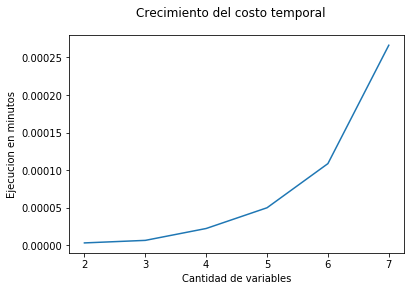

In [5]:
# Leo los resultados y los grafico

results = files.read_result("result_sat_optimo")

nodes = []
times = []

for result in results:

    res = result.split(',')
    res[1] = res[1].split()[0]

    nodes.append(int(res[0]))
    times.append(float(res[1]) / 60)

plot_historic(nodes, times)